In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# Ok i am changing the season here to the current one, I am interested in this seasons performance

#gameweek = pd.read_csv('TransformedData/GraphingGW.csv')
gameweek = pd.read_csv('../FPLmodels/Fantasy-Premier-League/data/2022-23/gws/merged_gw.csv')
pd.set_option("display.max_columns",None)
sns.set_theme() # To apply basic seaborn theme


In [3]:
gameweek.sample(5,random_state=0)
# columns = gameweek.columns


,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,expected_assists,expected_goal_involvements,expected_goals,expected_goals_conceded,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,starts,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
18748,Seamus Coleman,DEF,Everton,1.8,0,0,8,0,0.9,178,0.00,0.0,0.0,1.99,275,2,0,1.8,15.0,2023-03-18T17:30:00Z,83,6,0,0,0,0,28,0,107543,1,2,2,2.0,1,-8324,2456,10780,44,False,0,28.0
1624,Raphael Dias Belloli,MID,Leeds,0.0,0,0,0,0,0.0,232,0.00,0.0,0.0,0.00,25,0,0,0.0,0.0,2022-08-21T13:00:00Z,0,6,0,0,0,0,3,0,13179,0,0,3,0.0,0,-2330,0,2330,70,True,0,3.0
295,Ollie Watkins,FWD,Aston Villa,2.9,0,0,3,0,11.8,40,0.00,0.0,0.0,0.00,2,1,0,1.6,2.0,2022-08-06T14:00:00Z,24,3,0,0,0,0,1,0,324554,0,0,2,2.0,1,0,0,0,75,False,0,1.0
19900,Marc Roca Junqué,MID,Leeds,7.1,0,0,20,0,11.3,245,0.02,0.0,0.0,3.41,281,4,0,2.8,16.8,2023-04-01T14:00:00Z,90,1,0,0,0,0,29,0,7860,1,1,4,0.0,2,-3,90,93,48,False,0,29.0
12366,Rúben Gato Alves Dias,DEF,Man City,0.5,0,0,3,0,0.0,312,0.00,0.0,0.0,0.00,68,0,0,0.2,2.0,2023-01-19T20:00:00Z,1,18,0,0,0,0,20,0,632862,0,2,4,0.0,1,-34450,944,35394,59,True,0,20.0


In [ ]:
gameweek.query("position == 'FWD' & round == 29") # I like this very much easier to read


PD

In [6]:
# we are trying to self merge the table 
columns = gameweek.columns

temporal = gameweek.merge(right=gameweek, how='left',on='name',suffixes=['','_lag']) 
print("The columns in our dataframe:\n",columns)


The columns in our dataframe:
 Index(['name', 'position', 'team', 'xP', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'expected_assists',
       'expected_goal_involvements', 'expected_goals',
       'expected_goals_conceded', 'fixture', 'goals_conceded', 'goals_scored',
       'ict_index', 'influence', 'kickoff_time', 'minutes', 'opponent_team',
       'own_goals', 'penalties_missed', 'penalties_saved', 'red_cards',
       'round', 'saves', 'selected', 'starts', 'team_a_score', 'team_h_score',
       'threat', 'total_points', 'transfers_balance', 'transfers_in',
       'transfers_out', 'value', 'was_home', 'yellow_cards', 'GW'],
      dtype='object')


In [4]:
# okay lets start with some pivot tabels
series_temp =temporal[['round','round_lag']]
series_temp['lag'] = series_temp['round']-series_temp['round_lag']


NameError: name 'temporal' is not defined

Create Violin plot of player performance over the course of the seasom

In [ ]:
#these are some alterations that I need to manage:


def modify(df):
    return (df
    .assign(team            =df.team.astype("category")
        ,position       =df.position.astype("category")
        ,kickoffdate    =pd.to_datetime(df.kickoff_time).dt.date
        ,relativevalue = df.value*df.total_points
        #,kickofftime    =pd.to_datetime(df.kickoff_time).dt.time)
    .drop(columns=['kickoff_time'])
            ))
gameweek = modify(gameweek)
gameweek
#game_mod.to_csv('TransformedData/GraphingGW.csv')
# print(f'OLD  ',game.memory_usage(deep=True).sum()) 12916509

In [6]:

#We need players to know if there are active minutes played
def playtime(row):
    #we want player with real game time
    if row <5:
            result = 0
    else:
            result = 1
    return result

trendviolin = (gameweek[['position','was_home','round','kickoffdate','minutes','name','total_points','value','team']]
                .assign(was_home_ind =lambda x:gameweek['was_home'].replace({False: 0,True:1}))
                # .drop('was_home',axis=1)                
                )
trendviolin['playtime'] = trendviolin['minutes'].apply(playtime)                

In [ ]:
trendviolin.query("minutes > 0")  #query("position == 'DEF'")

Text(0, 0.5, 'Total Points')

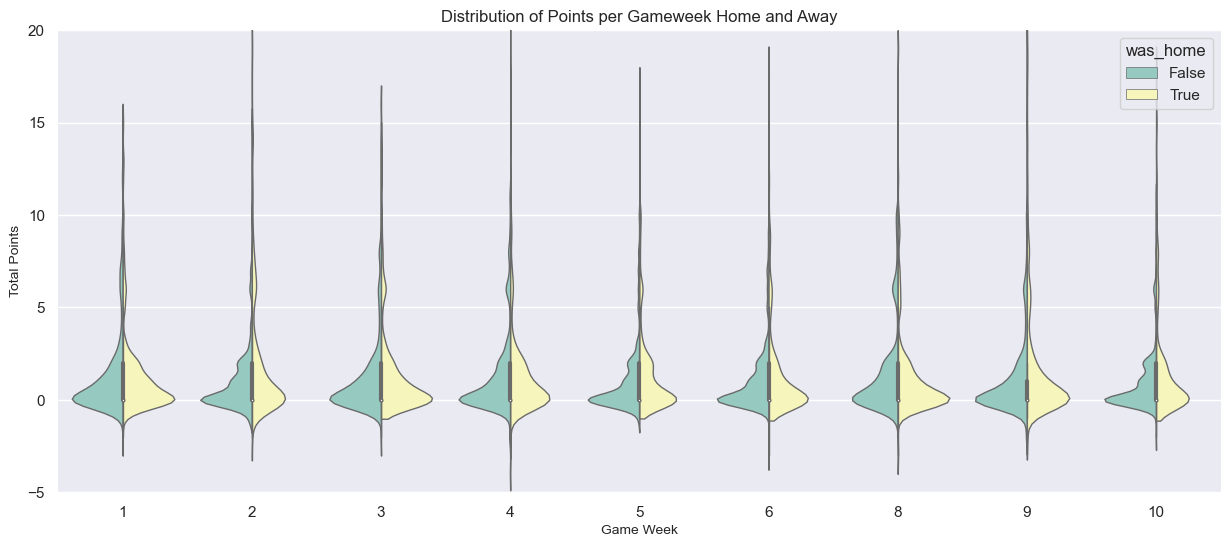

In [9]:
#Setting up the plot

f, ax = plt.subplots(figsize=(15,6))



sns.violinplot( x="round"
                , y="total_points"
                ,hue='was_home'
                , data=trendviolin[['round','total_points','was_home']].query(" round <11")
                , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1)

# Finalize the figure
ax.set(ylim=(-5, 20))
ax.set(title='Distribution of Points per Gameweek Home and Away'
)
sns.despine(left=True, bottom=True)
ax.set_xlabel("Game Week", fontsize = 10)
ax.set_ylabel("Total Points", fontsize = 10)

In [ ]:
# create subplots of every position

f, ax = plt.subplots(4,1, figsize=(15,10))

ax.set(title='Distribution of Points per Gameweek Home and Away Per Positions'
)

sns.violinplot( x="round"
                , y="total_points"
                ,hue='was_home'
                , data=trendviolin[['round','total_points','minutes','was_home','position']].query(" round <11 & position == 'GK'")
                , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1
                ,ax=ax[0])

sns.violinplot( x="round"
                , y="total_points"
                ,hue='was_home'
                , data=trendviolin[['round','total_points','minutes','was_home','position']].query(" round <11 & position == 'DEF'")
                , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1
                ,ax=ax[1])

sns.violinplot( x="round"
                , y="total_points"
                ,hue='was_home'
                , data=trendviolin[['round','total_points','minutes','was_home','position']].query(" round <11 & position == 'MID'")
                , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1
                ,ax=ax[2])

sns.violinplot( x="round"
                , y="total_points"
                ,hue='was_home'
                , data=trendviolin[['round','total_points','minutes','was_home','position']].query(" round <11 & position == 'FWD'")
                , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1
                ,ax=ax[3])


ax.set_xlabel("Game Week", fontsize = 10)
ax.set_ylabel("Player Position", fontsize = 10)
# Finalize the figure
# ax.set(ylim=(-5, 20))
sns.despine(left=True, bottom=True)

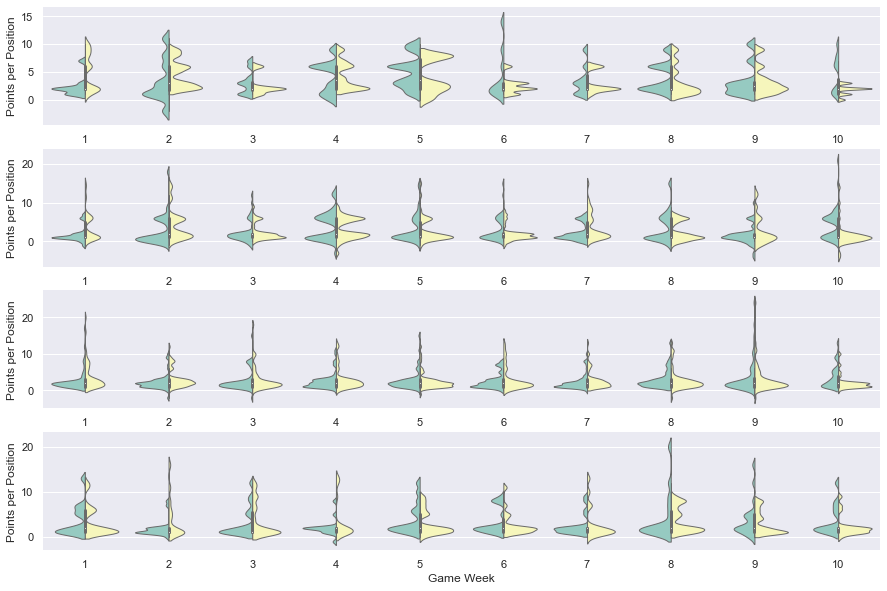

In [38]:
#with playtime minutes


f, ax = plt.subplots(4,1, figsize=(15,10))



sns.violinplot( x="round"
                , y="total_points"
                ,hue='was_home'
                , data=trendviolin[['round','total_points','minutes','was_home','position']].query(" round <11 & position == 'GK' & minutes > 0")
                , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1
                ,ax=ax[0])

sns.violinplot( x="round"
                , y="total_points"
                ,hue='was_home'
                , data=trendviolin[['round','total_points','minutes','was_home','position']].query(" round <11 & position == 'DEF'  & minutes > 0")
                , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1
                ,ax=ax[1])

sns.violinplot( x="round"
                , y="total_points"
                ,hue='was_home'
                , data=trendviolin[['round','total_points','minutes','was_home','position']].query(" round <11 & position == 'MID' & minutes > 0")
                , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1
                ,ax=ax[2])

sns.violinplot( x="round"
                , y="total_points"
                ,hue='was_home'
                , data=trendviolin[['round','total_points','minutes','was_home','position']].query(" round <11 & position == 'FWD' & minutes > 0")
                , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1
                ,ax=ax[3])

# Finalize the figure
# ax.set(ylim=(-5, 20))
for ax in ax.flat:
    ax.set(xlabel='Game Week', ylabel='Points per Position')
    ax.get_legend().remove()
sns.despine(left=True, bottom=True)


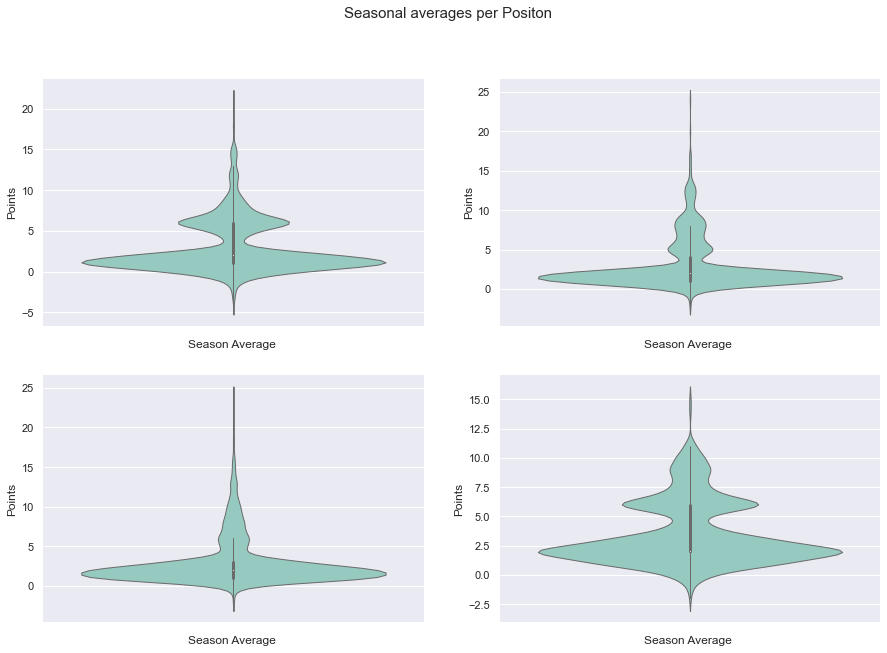

In [92]:
# lets look at overall peformance over the season
position = trendviolin['position'].unique().reshape(2,2)


f, ax = plt.subplots(2,2, figsize=(15,10))



f.suptitle('Seasonal averages per Positon', fontsize=15)
for i in range(2):
    for j in range(2):
        p = position[i,j]
        sns.violinplot( #x="round"
                        y="total_points"
                        ,hue='was_home'
                        ,data=trendviolin[['round','total_points','minutes','was_home','position']].query(f"position == '{p}' & minutes > 0")
                        ,palette="Set3"
                        ,split=True
                        ,bw=.2
                        ,linewidth=1
                        ,ax=ax[i,j]
                        )

# Finalize the figure
p2 = trendviolin['position'].unique()

for ax in ax.flat:
    # print(ax.index())
    ax.set(xlabel=f"Season Average ", ylabel='Points') # think about this 
    
sns.despine(left=True, bottom=True)



In [93]:

pd.pivot_table(trendviolin,
                    values='total_points',
                    index='position',
                    columns=['round'])

round,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
position,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DEF,1.375661,1.628866,1.147208,1.661765,1.407767,1.173077,1.259615,1.411483,0.985714,1.331754,1.459716,1.507042,1.554974,1.162037,1.299539,1.390863,1.357143,1.612903,1.045161,0.956790,1.000000,0.933071,1.428030,1.032258,1.489270,1.026087,1.542453,1.132743,1.248428,0.980198,1.173585,1.032787,1.054983,1.353160,1.044534,1.153846,1.240260,0.959514
FWD,1.693333,1.368421,1.730769,1.277108,1.500000,1.482353,1.294118,1.764706,1.635294,1.186047,0.941860,1.639535,1.025316,1.348837,1.218391,1.151899,1.064516,1.115385,1.614035,1.600000,0.943182,1.237624,1.093458,1.098765,0.924731,1.176923,0.976744,1.289855,1.163934,1.241379,1.121495,1.276596,1.139130,1.310680,1.147368,1.144330,0.852459,1.153061
GK,1.245614,1.316667,0.890625,1.257576,1.373134,0.970588,0.941176,1.028571,0.942857,0.861111,1.055556,0.986111,1.169231,0.875000,0.835616,1.147059,1.072727,0.848485,0.730769,1.134615,0.646341,0.786517,1.088889,0.810811,1.231707,0.675214,1.039474,0.818966,0.990909,0.542857,0.709677,0.963855,0.765306,1.191011,0.939759,0.759036,0.980000,0.614458
MID,1.781116,1.461864,1.403361,1.430894,1.369478,1.364000,1.281746,1.367589,1.652174,1.492126,1.203922,1.307692,1.288703,1.328244,1.361217,1.393305,1.470899,1.454545,1.634409,1.310160,1.528369,1.339683,1.041667,1.273764,1.136986,1.363196,1.100775,1.317308,1.125320,1.173228,1.253049,1.322259,1.308571,1.054054,1.229508,1.263844,1.286432,1.385113



p2 = trendviolin['position'].unique()

['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_function__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__class_getitem__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__dlpack__', '__dlpack_device__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imatmul__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '

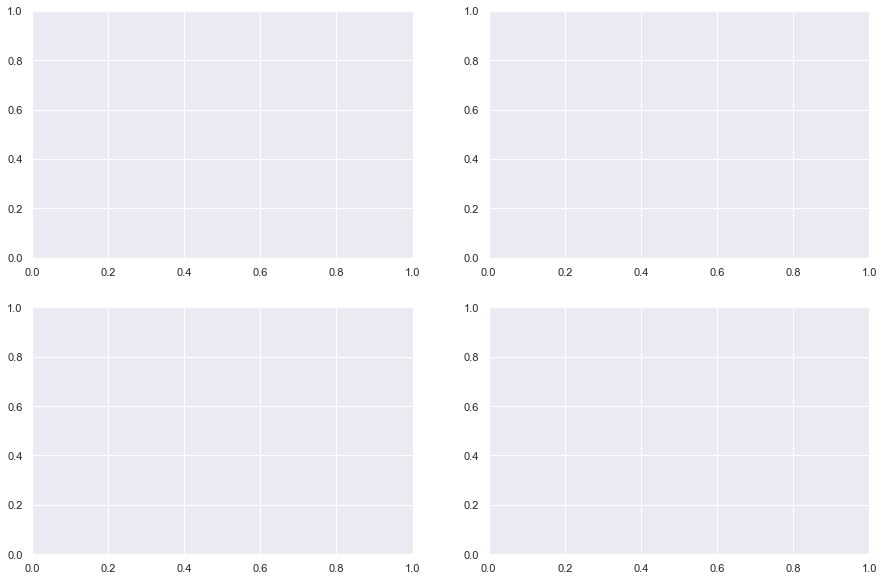

In [94]:
p2 = trendviolin['position'].unique()
f, ax = plt.subplots(2,2, figsize=(15,10))

print(dir(ax))

for ax in ax.flat:
    print(type(ax))
    
    # print(f"Season Average '{p2[ax]}'")




In [ ]:
trendviolin = (gameweek[['position','was_home','round','kickoff_time','minutes','name','total_points','transfers_balance','transfers_in', 'transfers_out' ,'value']]
                .assign(was_home_ind =lambda x:gameweek['was_home'].replace({False: 0,True:1}))
                # .drop('was_home',axis=1)                
                )
trendviolin.sample(5)

<AxesSubplot:xlabel='round', ylabel='transfers_balance'>

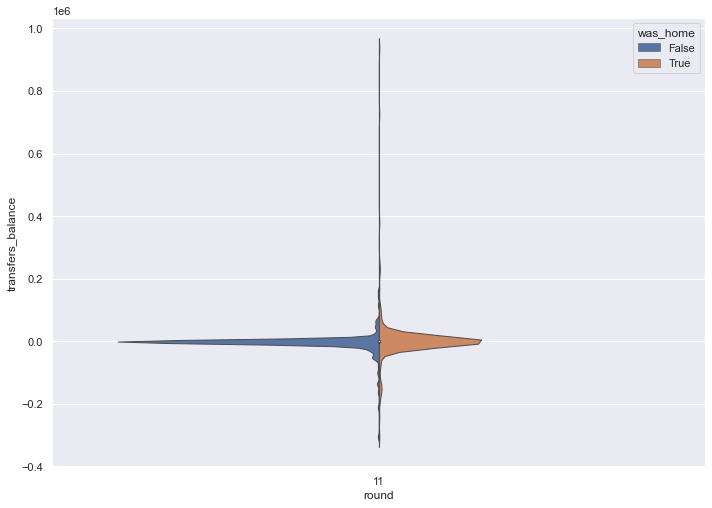

In [50]:



sns.violinplot( x="round"
                , y="transfers_balance"
                ,hue='was_home'
                , data=trendviolin.query(" round ==11")
                # , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1
                )


[Text(0.5, 1.0, 'Value of players per positions')]

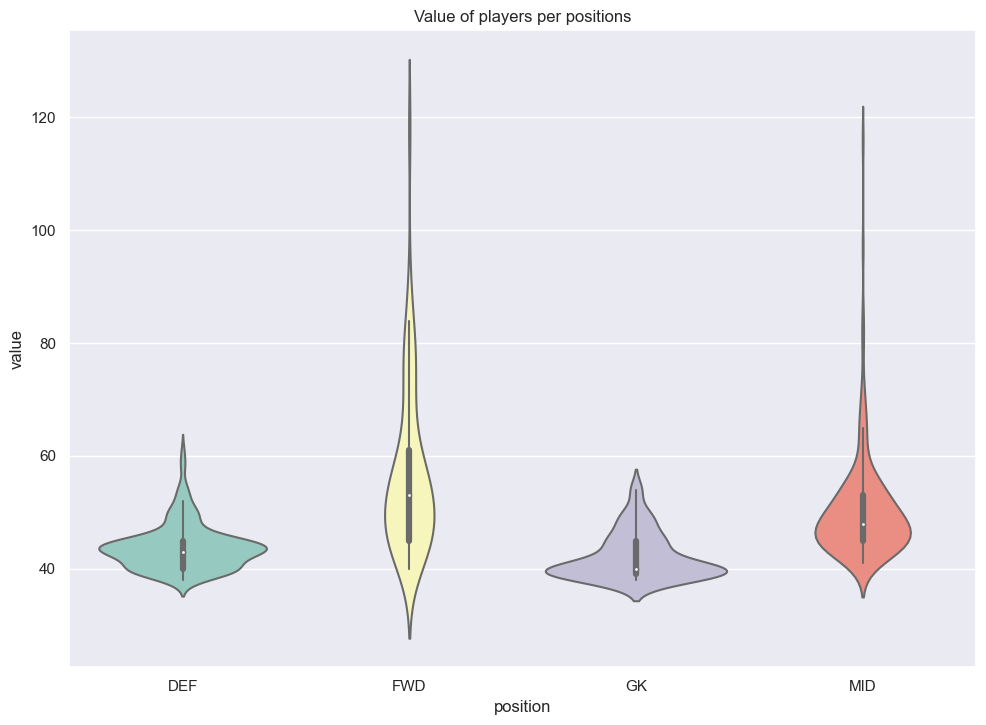

In [9]:


sns.violinplot( x="position"
                ,y="value"
                #,hue='was_home'
                , data=trendviolin.query(" round ==28")
                , palette="Set3"
                # ,split=True
                # , bw=.2
                # , cut=1
                # , linewidth=1
                ).set(title='Value of players per positions')


[Text(0.5, 1.0, 'Points of players per positions')]

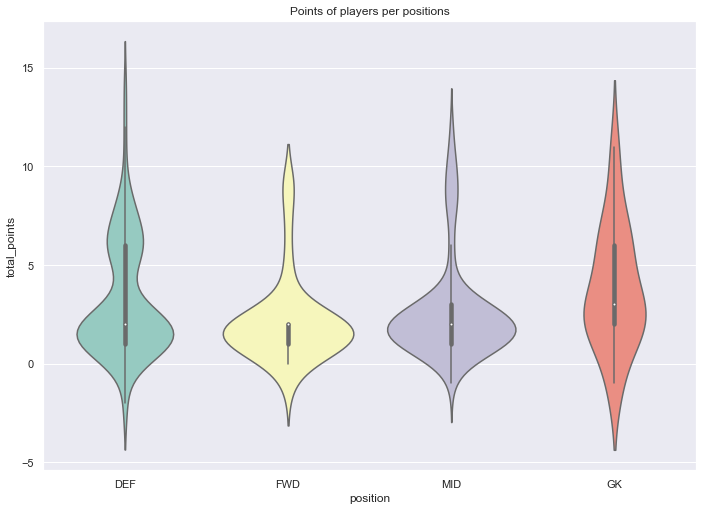

In [109]:
trendviolin['playtime'] = trendviolin['minutes'].apply(playtime)       
sns.violinplot( x="position"
                , y="total_points"
                #,hue='was_home'
                , data=trendviolin.query(" round ==11 & playtime >0")
                , palette="Set3"
                # ,split=True
                # , bw=.2
                # , cut=1
                # , linewidth=1
                ).set(title='Points of players per positions')

[Text(0.5, 1.0, 'Scatter plot of Points earned and Price point of player')]

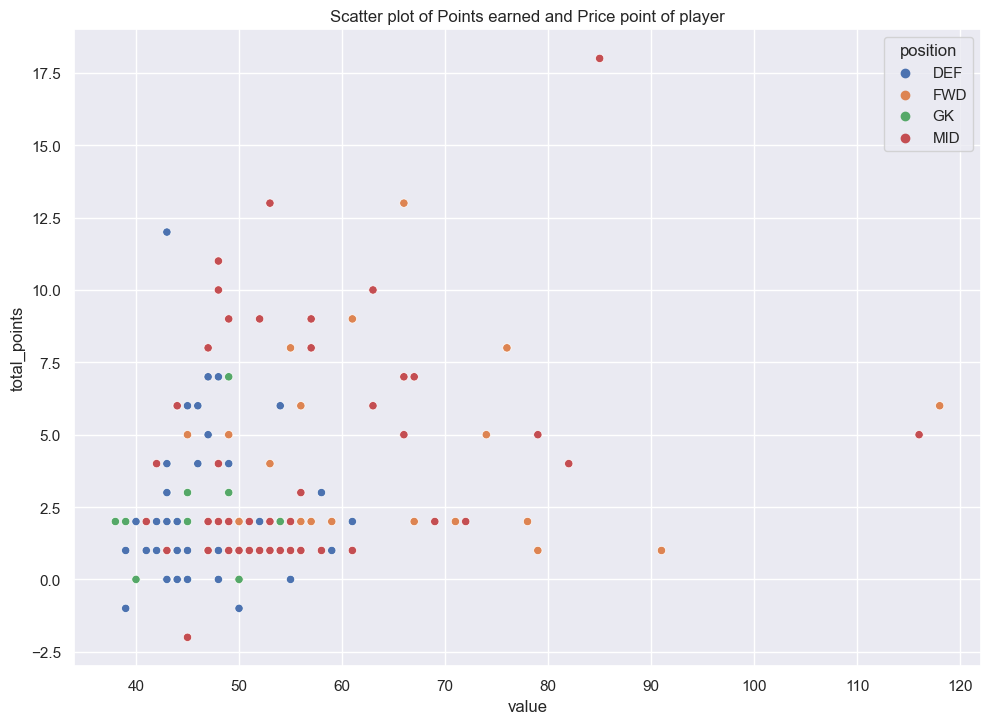

In [11]:
# lets do a scatterplot of value and points

sns.scatterplot(x="value"
                ,y="total_points"
                ,hue="position"
                ,data=trendviolin.query("round ==28 & playtime >0")
                ,).set(title='Scatter plot of Points earned and Price point of player')
# plot evolution of total points and value of players


In [14]:
top5_players_per_position

,name,position,round,value,total_points
0,Virgil van Dijk,DEF,25,65.0,24
1,Serge Aurier,DEF,18,45.0,20
2,Aaron Wan-Bissaka,DEF,18,43.0,18
3,João Cancelo,DEF,10,72.0,18
4,Luke Shaw,DEF,18,49.0,18
5,Ivan Toney,FWD,18,75.0,24
6,Erling Haaland,FWD,9,121.0,23
7,Roberto Firmino,FWD,4,80.0,22
8,Callum Wilson,FWD,14,73.0,19
9,Callum Wilson,FWD,29,69.0,19


<AxesSubplot: xlabel='total_points', ylabel='Density'>

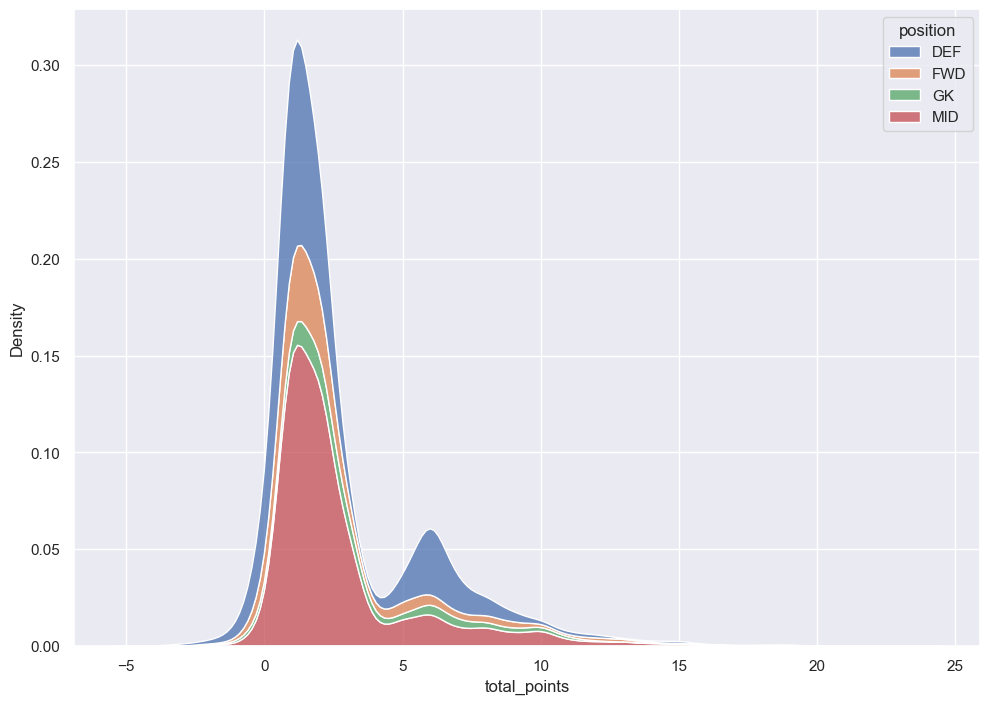

In [12]:
sns.kdeplot(data=trendviolin.query("minutes > 0"), x="total_points", hue='position',multiple='stack')

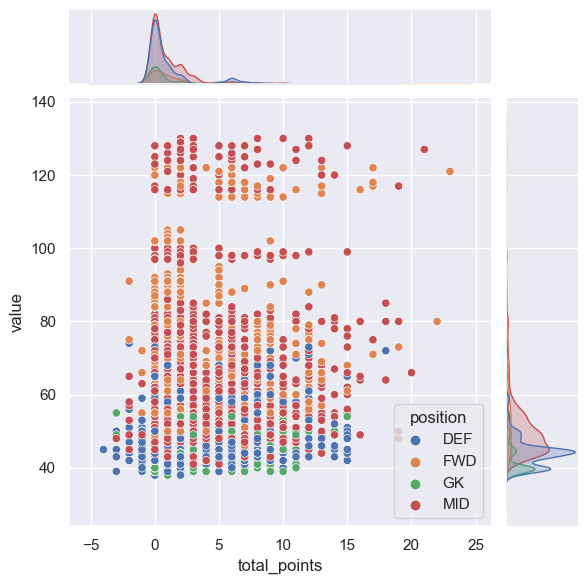

In [18]:
sns.jointplot(data=trendviolin, 
            x="total_points",
            y="value",
            hue="position")

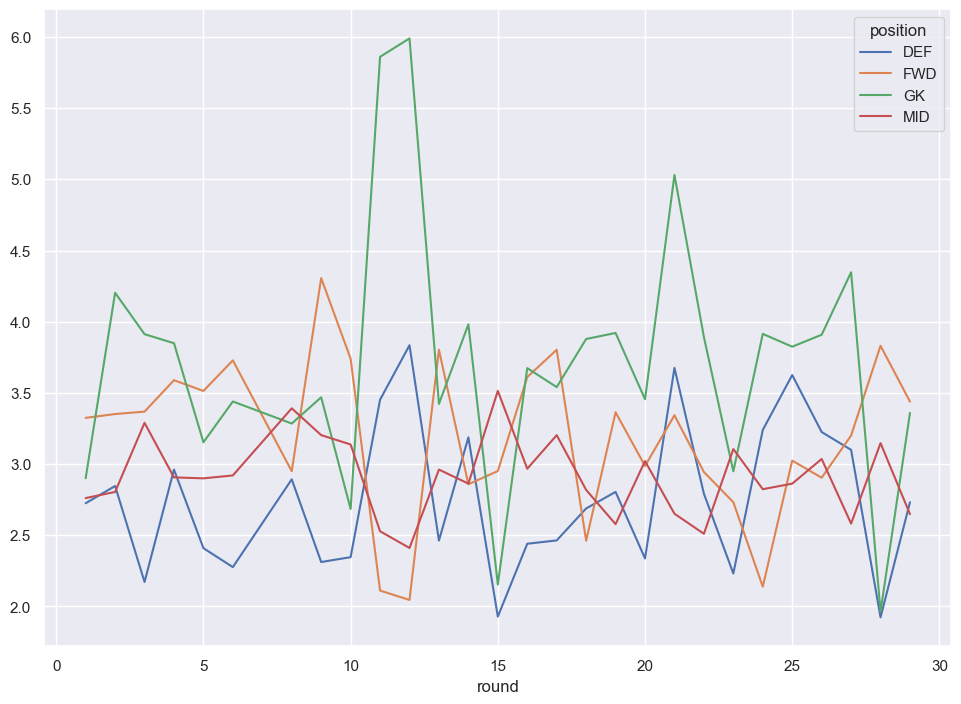

In [16]:
# attempt at plotting a weighted mean function



# trendviolin["value_and_points"] = trendviolin.value * trendviolin.total_points
def w_avg(df, values, weights):
    d = df[values]
    w = df[weights]
    return (d * w).sum() / w.sum()


w_test =(trendviolin
.query("minutes > 0")
# .query("was_home == False")
.assign(value_and_point = trendviolin['value']*trendviolin['total_points'])
.groupby(['round','position'])
.apply(w_avg,'total_points', 'value')
.unstack()
.plot()
# .mean()
#.sum(['value_and_points','value'])
)

In [20]:
w_test

<AxesSubplot: xlabel='round'>

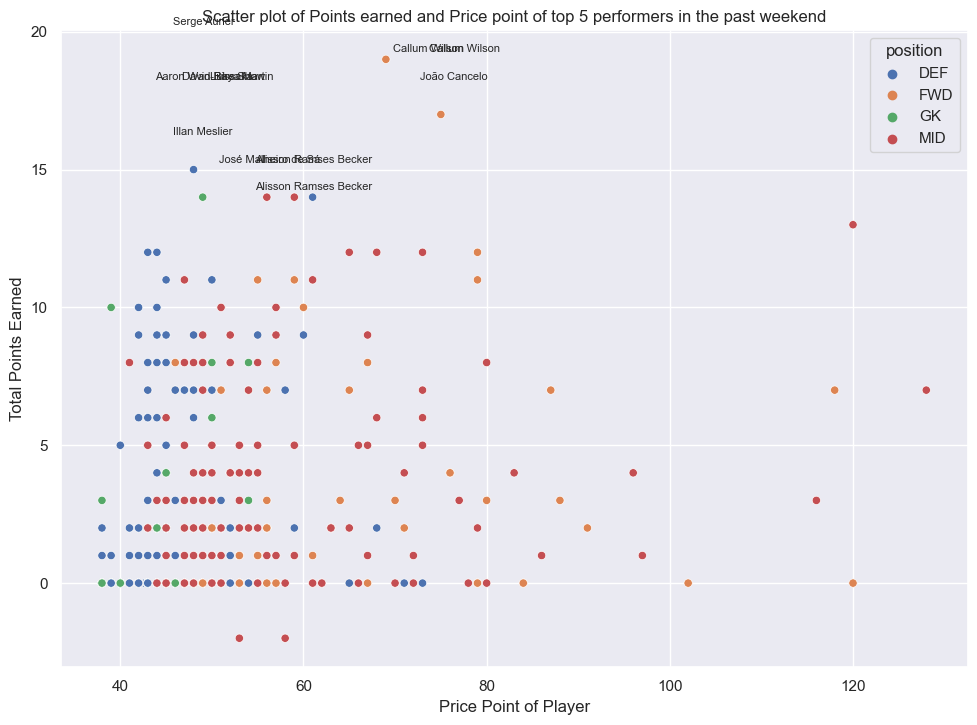

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the DataFrame by player name and position and calculate the mean value and total points
top_players = gameweek.groupby(['name', 'position', 'round']).agg({'value': 'mean', 'total_points': 'sum'}).reset_index()

# Filter out rows with missing (null) values
top_players = top_players.dropna()


# Select the top 5 players per position based on total_points
top5_players_per_position = top_players.groupby('position').apply(lambda x: x.nlargest(5, 'total_points')).reset_index(drop=True)


# Create the scatter plot for all players
scatter_plot = sns.scatterplot(x="value", y="total_points", hue="position", data=top_players.query("round == 29"))

# Add player names as annotations
for index, row in top5_players_per_position.iterrows():
    scatter_plot.annotate(row['name'], xy=(row['value'], row['total_points']), xytext=(5, 5), textcoords='offset points', fontsize=8)

# Set plot title and axis labels
plt.title('Scatter plot of Points earned and Price point of top 5 performers in the past weekend')
plt.xlabel('Price Point of Player')
plt.ylabel('Total Points Earned')

# Show the plot
plt.show()


In [8]:
import plotly.express as px

# Filter the data for round 29 and playtime > 0
filtered_data = trendviolin.query("round ==29 & playtime >0")

# Create the scatter plot using Plotly Express
scatter_plot = px.scatter(filtered_data, x="value", y="total_points", color="position", hover_name="name")

# Customize the plot title and axis labels
scatter_plot.update_layout(
    title="Scatter plot of Points earned and Price point of player",
    xaxis_title="Price Point of Player",
    yaxis_title="Total Points Earned"
)

# Show the plot
scatter_plot.show()


In [15]:
import plotly.express as px

# Filter the data for round 29 and playtime > 0
filtered_data = trendviolin.query("round ==28 & playtime >0")

# Create the scatter plot using Plotly Express
scatter_plot = px.scatter(filtered_data, x="value", y="total_points", color="position", hover_name="name")

# Customize the plot title and axis labels
scatter_plot.update_layout(
    title="Scatter plot of Points earned and Price point of player",
    xaxis_title="Price Point of Player",
    yaxis_title="Total Points Earned",
    
    # Modify legend properties
    legend=dict(
        title="Player Position",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    
    # Modify axis properties
    xaxis=dict(
        tickfont=dict(size=12),
        gridcolor='lightgray'
    ),
    yaxis=dict(
        tickfont=dict(size=12),
        gridcolor='lightgray'
    )
)

# Update marker properties
scatter_plot.update_traces(
    marker=dict(
        size=10,
        line=dict(
            width=1,
            color='DarkSlateGrey'
        )
    )
)

# Show the plot
scatter_plot.show()


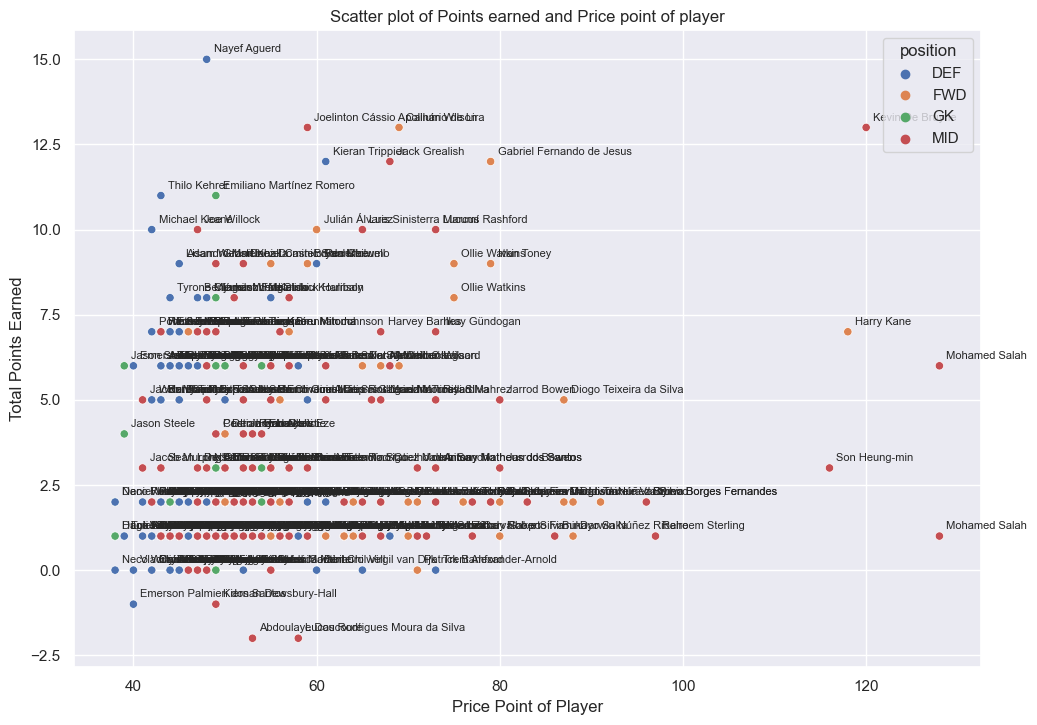

In [29]:
# Create the scatter plot
scatter_plot = sns.scatterplot(x="value", y="total_points", hue="position", data=trendviolin.query("round ==29 & playtime >0"))

# Add player names as annotations
for index, row in trendviolin.query("round ==29 & playtime >0").iterrows():
    scatter_plot.annotate(row['name'], xy=(row['value'], row['total_points']), xytext=(5, 5), textcoords='offset points', fontsize=8)

# Set plot title and axis labels
plt.title('Scatter plot of Points earned and Price point of player')
plt.xlabel('Price Point of Player')
plt.ylabel('Total Points Earned')

# Show the plot
plt.show()

In [10]:
top_players_sorted = top_players.sort_values(['position', 'total_points'], ascending=False)
# Group the DataFrame by player name and position and calculate the mean value and total points
top_players = gameweek.groupby(['name', 'position']).agg({'value': 'mean', 'total_points': 'sum'}).reset_index().dropna()
# Sort the DataFrame by position and total points
top_players_top5 = top_players_sorted.groupby('position').head(5)
top_players_top5

NameError: name 'top_players' is not defined